Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose of Data Mining Report

#### *A1. Relevant Question*

Can we predict the amount customers pay monthly based on customers' demographic and account information?

#### *A2. Analysis Goal*

The goal of this analysis was to see if we could accurately predict `MonthlyCharge` using other variables. Based on previous reports, the amounts that customers pay affected the churn rate. Customers who disconnected service paid more than customers who stayed with the company. If we could identify which customers were likely to paid more, we could create strategies to prevent them from leaving.

### B. Method Justification

#### *B1. Explanation of Method*

Random Forest is an ensemble learning method. It builds a series of decision trees by taking random samples from the original dataset. The trees are then used to classify the observations in the dataset. Since these classifications are unlikely to be unanimous, each classification is a vote for a dependent variable value. The value with the most votes is the final classification result (Larose & Larose, 2019). Since Random Forest combines the results of all the decision trees, it reduces overfitting and improves accuracy. It can automatically handle missing values and do not require scaling for the variables. Our model should perform well with high accuracy in predicting customers' monthly payments.

#### *B2. Summary of Assumption*

The only assumption Random Forest makes is that sampling is representative. This means if one class in the dataset contained significantly more samples than other classes, the decision trees will be more bias toward classifying the class with more samples (Laptev, 2013).

#### *B3. Python Libraries*

The libraries used for this analysis were:

- `numpy`: efficient numeric computation library.
- `pandas`: fast and flexibile data structures, such as Series and DataFrame, for data manipulation.
- `matplotlib` and `seaborn`: beautiful graphs and figures for data visualizations.
- `scikit-learn`: various functions and classes related to machine learning, such as classification and regression.

### C. Data Preparation

#### *C1. Processing Goal*

The first step for data preparation was to create a new dataframe
containing only the independent and dependent variables.

#### *C2. Initial Dataset*

The initial dataset contained customers' account and demographic variables. This dataset contained both categorical and continuous variables.

The 5 continuous variables were: `Age`, `Children`, `Income`, `Population`, and `Tenure`.

The 11 categorical variables were: `Area`, `Contract`, `DeviceProtection`, `Gender`, `InternetService`, `Marital`, `OnlineBackup`, `OnlineSecurity`, `StreamingMovies`, `StreamingTV`, and `TechSupport`.

The dependent continuous variable was `MonthlyCharge`.

#### *C3. Preparation Steps*

The steps to prepare the data were:

1. Import libraries and dataset.
2. Create new dataframe for relevant variables.
3. Explore variables and their basic statistics.
4. Visualize variables.
5. Encode categorical variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
# Import dataset
churn = pd.read_csv('churn_clean.csv')

In [3]:
# Create dataframe with relevant variables
df = churn[['Age', 'Children', 'Income', 'Population', 'Tenure', 'Area', 'Contract', 'DeviceProtection', 'Gender', 'InternetService',
            'Marital', 'MonthlyCharge', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']].copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Children          10000 non-null  int64  
 2   Income            10000 non-null  float64
 3   Population        10000 non-null  int64  
 4   Tenure            10000 non-null  float64
 5   Area              10000 non-null  object 
 6   Contract          10000 non-null  object 
 7   DeviceProtection  10000 non-null  object 
 8   Gender            10000 non-null  object 
 9   InternetService   10000 non-null  object 
 10  Marital           10000 non-null  object 
 11  MonthlyCharge     10000 non-null  float64
 12  OnlineBackup      10000 non-null  object 
 13  OnlineSecurity    10000 non-null  object 
 14  StreamingMovies   10000 non-null  object 
 15  StreamingTV       10000 non-null  object 
 16  TechSupport       10000 non-null  object 

In [5]:
# Explore continuous variables
df.describe()

,Age,Children,Income,Population,Tenure,MonthlyCharge
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,2.0877,39806.926771,9756.562400,34.526188,172.624816
std,20.698882,2.1472,28199.916702,14432.698671,26.443063,42.943094
min,18.000000,0.0000,348.670000,0.000000,1.000259,79.978860
25%,35.000000,0.0000,19224.717500,738.000000,7.917694,139.979239
50%,53.000000,1.0000,33170.605000,2910.500000,35.430507,167.484700
75%,71.000000,3.0000,53246.170000,13168.000000,61.479795,200.734725
max,89.000000,10.0000,258900.700000,111850.000000,71.999280,290.160419


In [6]:
# Explore categorical variables
df.describe(include='object')

,Area,Contract,DeviceProtection,Gender,InternetService,Marital,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTV,TechSupport
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,3,2,3,3,5,2,2,2,2,2
top,Suburban,Month-to-month,No,Female,Fiber Optic,Divorced,No,No,No,No,No
freq,3346,5456,5614,5025,4408,2092,5494,6424,5110,5071,6250


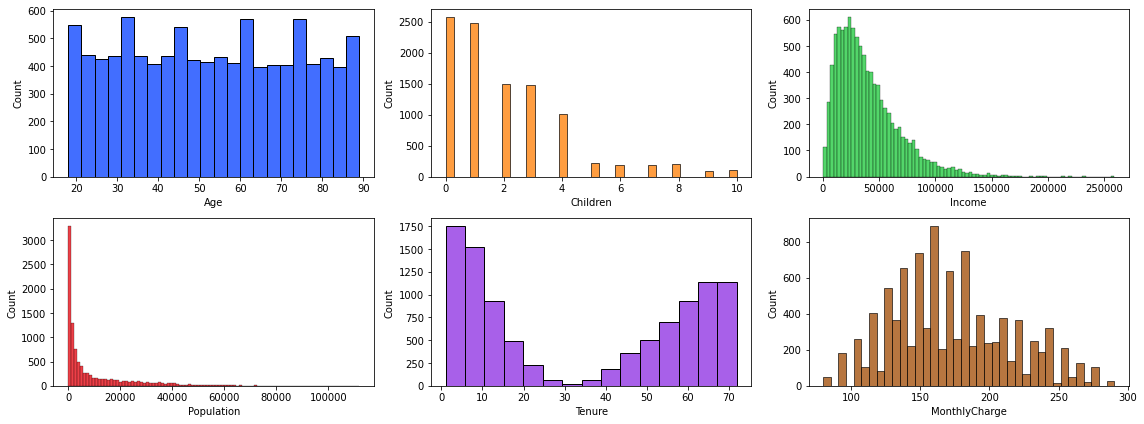

In [7]:
# List of continuous variables
cont = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 6))

# Adapted from seaborn documentation (Waskom, 2022)
# https://seaborn.pydata.org/tutorial/color_palettes.html
pal = sns.color_palette('bright')

# Set up counters
row = 0
col = 0

# Visualize continuous variables with histograms
for idx, var in enumerate(cont):
    if col == 3:
        row += 1
        col = 0
    sns.histplot(ax=axes[row, col], data=df[var], color=pal[idx])
    col += 1

plt.tight_layout()
plt.show()

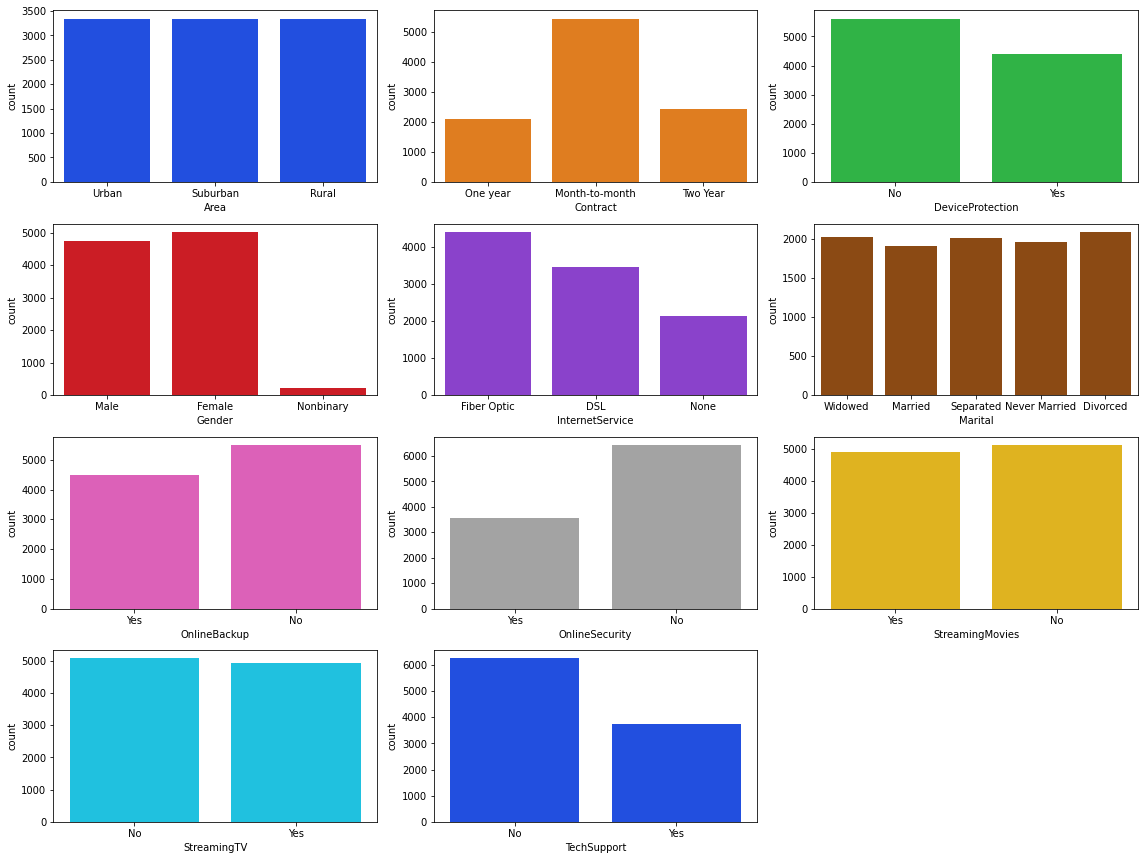

In [8]:
# List of categorical variables
cat = df.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(16, 12))

# Set up counters
row = 0
col = 0
color = 0

# Visualize categorical variables with countplots
for var in cat:
    if col == 3:
        row += 1
        col = 0
    if color == 10:
        color = 0
    sns.countplot(ax=axes[row, col], x=var, data=df, color=pal[color])
    col += 1
    color += 1

fig.delaxes(axes[3, 2])
plt.tight_layout()
plt.show()

In [9]:
# Encode categorical columns with dummy variables
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  int64  
 1   Children                     10000 non-null  int64  
 2   Income                       10000 non-null  float64
 3   Population                   10000 non-null  int64  
 4   Tenure                       10000 non-null  float64
 5   MonthlyCharge                10000 non-null  float64
 6   Area_Suburban                10000 non-null  uint8  
 7   Area_Urban                   10000 non-null  uint8  
 8   Contract_One year            10000 non-null  uint8  
 9   Contract_Two Year            10000 non-null  uint8  
 10  DeviceProtection_Yes         10000 non-null  uint8  
 11  Gender_Male                  10000 non-null  uint8  
 12  Gender_Nonbinary             10000 non-null  uint8  
 13  InternetService_F

#### *C4. Export Prepared Data*

In [11]:
# Export prepared data to CSV
df.to_csv('churn_prep.csv', index=False)

### D. Data Analysis

#### *D1. Split Data*

In [12]:
# Create X and y
y = df['MonthlyCharge']
X = df.drop('MonthlyCharge', axis=1)

# Split data with 30% test set
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [13]:
# Export training and testing data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

#### *D2. Analysis Description*

The steps to perform Random Forest regression were:

1. Split data into training and testing.
2. Fit model and make predictions
3. Evaluate model using R<sup>2</sup>, MSE, and RMSE.
4. Plot feature importances.
5. Remove variables with low importances.
6. Refit model and check metrics.

In [14]:
# Create default RF regressor
rfr = RandomForestRegressor(random_state=seed)

# Fit and make predictions
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [15]:
# Function to evaluate metrics
def eval_metrics(x_set, y_set, pred):
    r2 = R2(y_set, pred)
    mse = MSE(y_set, pred)
    rmse = mse**(1/2)
    print(f'Evaluation Metrics:\n- R^2: {r2:.2f}\n- MSE: {mse:.2f}\n- RMSE: {rmse:.2f}')
    
eval_metrics(X_test, y_test, y_pred)

Evaluation Metrics:
- R^2: 0.84
- MSE: 289.94
- RMSE: 17.03


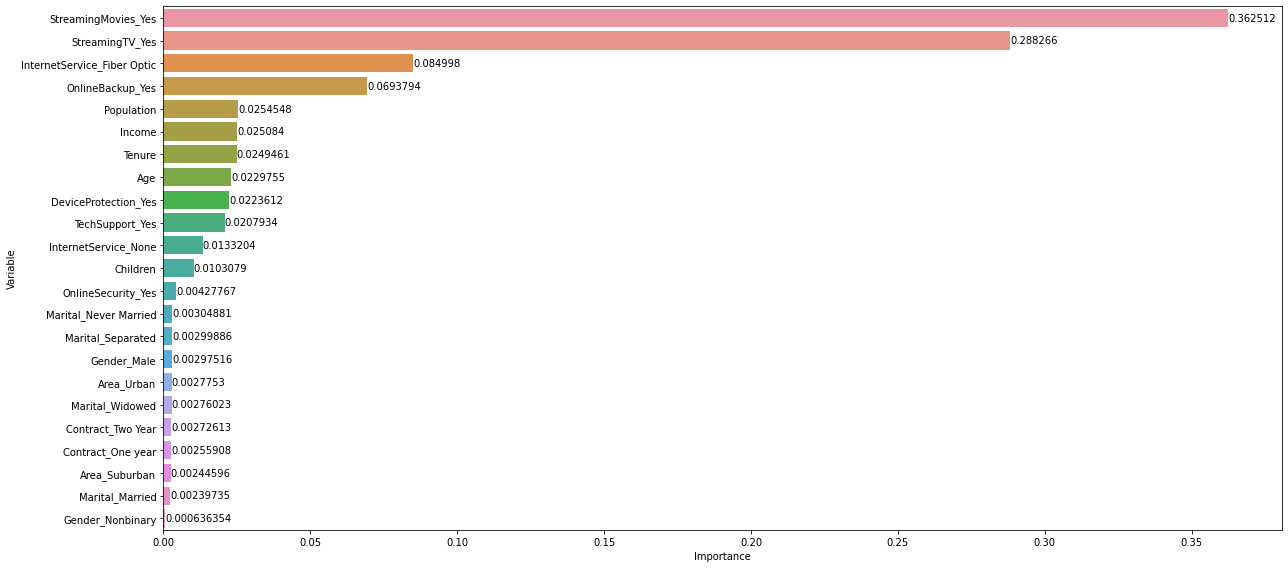

In [16]:
# Create dataframe of feature importances
importances_rf = pd.DataFrame({'Variable': X.columns, 'Importance': rfr.feature_importances_})
importances_rf.sort_values(by=['Importance'], inplace=True, ascending=False)

# Barplots of feature importances
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Importance', y='Variable', data=importances_rf)

# Adapted from Stackoverflow
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

In [17]:
# Remove variables with importance less than 0.01
df.drop(['OnlineSecurity_Yes', 'Gender_Male', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Area_Urban', 
         'Marital_Widowed', 'Contract_One year', 'Marital_Married', 'Area_Suburban', 'Gender_Nonbinary'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  int64  
 1   Children                     10000 non-null  int64  
 2   Income                       10000 non-null  float64
 3   Population                   10000 non-null  int64  
 4   Tenure                       10000 non-null  float64
 5   MonthlyCharge                10000 non-null  float64
 6   DeviceProtection_Yes         10000 non-null  uint8  
 7   InternetService_Fiber Optic  10000 non-null  uint8  
 8   InternetService_None         10000 non-null  uint8  
 9   OnlineBackup_Yes             10000 non-null  uint8  
 10  StreamingMovies_Yes          10000 non-null  uint8  
 11  StreamingTV_Yes              10000 non-null  uint8  
 12  TechSupport_Yes              10000 non-null  uint8  
dtypes: float64(3), in

In [19]:
# Create X and y again with new data
y = df['MonthlyCharge']
X = df.drop('MonthlyCharge', axis=1)

# Split new data with 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [20]:
# Hyperparameters to tune
params_rfr = {
    'n_estimators': [300, 400, 500],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['log2', 'sqrt'],
}

# Create grid search CV object
grid_rfr = GridSearchCV(
    estimator=rfr,
    param_grid=params_rfr,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit and tune model
grid_rfr.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'n_estimators': [300, 400, 500]},
             scoring='r2', verbose=1)

In [21]:
# Check best hyperparameters
grid_rfr.best_params_

{'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 400}

In [22]:
# Extract best model to make predictions
best_model = grid_rfr.best_estimator_
y_pred = best_model.predict(X_test)

# Check metrics of best model
eval_metrics(X_test, y_test, y_pred)

Evaluation Metrics:
- R^2: 0.85
- MSE: 280.80
- RMSE: 16.76


#### *D3. Analysis Code*

The code used to perform Random Forest regression and grid search CV could be found in section D2 above.

### E. Analysis Summary

#### *E1. Explanation of Metrics*

Random Forest regression uses the coefficient of determination, R<sup>2</sup> as the accuracy metric. R<sup>2</sup> is a goodness-of-fit measure. It indicates the percentage of variance in `MonthlyCharge` that can be explained by the independent variables (Fernando, 2021). Our model produced a score of 0.85, that means 85% of the observed variation could be explained by the model's inputs. This also indicates a strong positive relationship between independent and dependent variables.

The mean squared error (MSE) measures the amount of error in the model. It calculates the average squared difference between the observed and predicted values. As model error increases, MSE also increases (Frost, 2021). However, since the values of MSE are squared, they are less intuitive to understand. RMSE is the square root of MSE that is easier to interpret. RMSE is the distance between predicted and actual values. In the model, the RMSE was 16.76. Given `MonthlyCharge` as the dependent variable, that means the average difference between our predictions and actual values were only $16.76.

#### *E2. Analysis Results*

In the initial model, I used 23 independent variables to perform Random Forest regression. The results were:

- R<sup>2</sup>: 0.84
- MSE: 289.94
- RMSE: 17.03

These initial metrics were promising because the R<sup>2</sup> value indicated a high correlation between the dependent and independent variables. I also calculated the MSE and RMSE as reference for the model error. Random Forest also calculated the features importance during training. This allowed us to visualize the importances and removed 11 variables that did not contribute much to the model. To improve the model, I also used grid search and cross-validation to tune the hyperparameters. The new results were:

- R<sup>2</sup>: 0.85
- MSE: 280.80
- RMSE: 16.76

The improved metrics indicated that the model performed better in all aspects. Even though the improvements were not significant, they were still better despite using only half of the initial variables. With the high R<sup>2</sup> and low RMSE value, we could be confident to use our model to predict the monthly payments for new customers in the future.

#### *E3. Limitation of Analysis*

One limitation of our analysis was how computationally expensive it was. Combining Random Forest, grid search, and cross-validation together made the training time significantly longer. I had to test out different number of hyperparameters and cross-validation folds to made sure the model perform well enough in a short amount of time. To counter this, I can use randomized search cross-validation in future analysis.

#### *E4. Recommendatioon*

The recommendation is to use this model to predict how much new customers would be expected to pay given specific variables. This allows us to see if a customer is paying too much. In previous reports, we identified that customers who churn paid significantly more for their services. By seeing how much new customers will pay, we have the chance to offer them promotions or lower payments to prevent them from leaving.

### F. Panopto Recording

**Link**: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4a8dbeea-5d57-48c4-bdff-ae98008e56ba

### G. Third-Party Code

Waskom, M. (2022). Choosing color palettes — seaborn 0.11.2 documentation. Seaborn Documentation. Retrieved April 27, 2022, from https://seaborn.pydata.org/tutorial/color_palettes.html

Seaborn Barplot - Displaying Values. (2017, April 4). Stack Overflow. Retrieved May 14, 2022, from https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

### H. References

Fernando, S. (2021, September 12). What Is R-Squared? Investopedia. Retrieved May 14, 2022, from https://www.investopedia.com/terms/r/r-squared.asp

Frost, J. (2021, November 14). Mean Squared Error (MSE). Statistics By Jim. Retrieved May 14, 2022, from https://statisticsbyjim.com/regression/mean-squared-error-mse/

Laptev, D. (2013, May 15). Random forest assumptions. Cross Validated. Retrieved May 13, 2022, from https://stats.stackexchange.com/questions/59124/random-forest-assumptions

Larose, C. D., & Larose, D. T. (2019). Data Science Using Python and R. Wiley.